In [1]:
# Implementing Neaural network using Keras library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import style
style.use("ggplot")
import os

In [3]:
os.chdir('/fmnist')

In [4]:
train_set = pd.read_csv('fashion-mnist_train.csv')
test_set =  pd.read_csv('fashion-mnist_test.csv')

train_label = train_set['label']
test_label = test_set['label']

In [6]:
train_data = train_set.drop(['label'], axis=1)    #labels dropped
test_data = test_set.drop(['label'], axis=1)      #labels dropped

train_arr = np.array(train_data)  
test_arr = np.array(test_data)   

In [7]:
# Normalising data (since max pixel value is 256 in grayscale)
train_arr = train_arr/255.0
test_arr = test_arr/255.0

In [ ]:
test_arr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
import tensorflow as tf 
from tensorflow.keras.optimizers import SGD 

In [11]:
y = tf.keras.utils.to_categorical(train_label)
y_test = tf.keras.utils.to_categorical(test_label)

In [12]:
model = tf.keras.models.Sequential()  
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(256, kernel_initializer='random_normal', activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(128, kernel_initializer='random_normal', activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(64, kernel_initializer='random_normal', activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  

opt = SGD(lr=0.1, momentum=0.12)    # learning rate is 0.1 

model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_arr, y, epochs=15, batch_size=40)  # tunable parameters

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5700 - accuracy: 0.7940
Epoch 2/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3980 - accuracy: 0.8522
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3523 - accuracy: 0.8698
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3303 - accuracy: 0.8767
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8840
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2902 - accuracy: 0.8907
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2790 - accuracy: 0.8949
Epoch 8/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.8978
Epoch 9/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2565 - accuracy: 0.9033
Epoch 10/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2

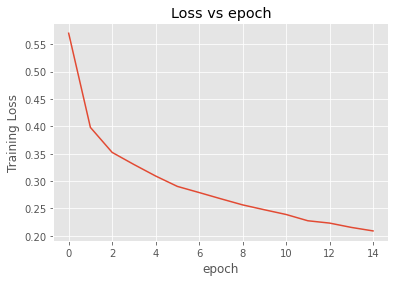

In [13]:
# Plotting Loss vs Epoch
plt.plot(history.history['loss'])
plt.title('Loss vs epoch')
plt.ylabel('Training Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
val_loss, val_acc = model.evaluate(test_arr, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.8950
0.3017536699771881
0.8949999809265137


In [15]:
#class-wise accuracy

def get_cwa(test_label, test_arr):

  predictions = (np.round(model.predict(test_arr)))
  y_pred = []

  for i in range(np.shape(predictions)[0]):
    flag=0
    y_pred.append(list(predictions[i]).index(max(list(predictions[i]))))
 
  cl_wise_accuracy = []
  for i in range(10):   # 10 : because 10 classes are available so loop runs for 10 classes 
    count = 0
    total = 0

    for j in range(test_label.shape[0]):
      if(test_label[j]==i):
        total += 1
        count += y_pred[j]==test_label[j]   # if prediction is true the count is increased

    cl_wise_accuracy.append(count/total)    # no. of predictions true / total data

  cl_wise_accuracy = np.array(cl_wise_accuracy)
  return cl_wise_accuracy

In [18]:
cl = get_cwa(test_label, test_arr)
for i in range(len(cl)):
  print("Accuracy of class", i, "is: ", cl[i])

Accuracy of class 0 is:  0.819
Accuracy of class 1 is:  0.981
Accuracy of class 2 is:  0.744
Accuracy of class 3 is:  0.855
Accuracy of class 4 is:  0.869
Accuracy of class 5 is:  0.951
Accuracy of class 6 is:  0.772
Accuracy of class 7 is:  0.949
Accuracy of class 8 is:  0.981
Accuracy of class 9 is:  0.964
